In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import os

# Import API key
api_key = os.environ['OWM']

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


647


In [22]:
city_profile = pd.DataFrame({'city': cities, 'lat': lats[0:len(cities)], 'lng': lngs[0:len(cities)]})
# city_profile = city_profile['city'].unique()
len(city_profile)
city_profile = city_profile.sort_values(['city'])
city_profile = city_profile.reset_index(drop = True)
# city_profile
city_profile.head()
# len(city_profile['city'])

,city,lat,lng
0,abrau-dyurso,11.716975,134.538417
1,abu zabad,-52.017384,-125.590862
2,acapulco,87.096199,-63.778317
3,acarau,-23.609510,-78.449076
4,achisay,36.600804,-174.827610


In [23]:
# generate 5 cities for testing
cities_test = city_profile['city'][0:5]
cities_test


0    abrau-dyurso
1       abu zabad
2        acapulco
3          acarau
4         achisay
Name: city, dtype: object

## Perform API Calls

In [24]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [27]:
query_url = f'{url}&q='
for city in cities_test:
        response = requests.get(query_url + city).json()       
        pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 44.7, 'lon': 37.6},
 'dt': 1533421800,
 'id': 584365,
 'main': {'humidity': 88,
          'pressure': 1011,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Abrau-Dyurso',
 'sys': {'country': 'RU',
         'id': 7294,
         'message': 0.0043,
         'sunrise': 1533349197,
         'sunset': 1533401432,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 40, 'speed': 6.71}}
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 12.35, 'lon': 29.25},
 'dt': 1533424475,
 'id': 380348,
 'main': {'grnd_level': 954.91,
          'humidity': 97,
          'pressure': 954.91,
          'sea_level': 1024.89,
          'temp': 69.53,
          'temp_max': 69.53,
          'temp_min': 69.53},
 'name': 'Abu Zabad',
 'sys': {'co

In [30]:
# generate query url
query_url = f'{url}&q='
index = 0
temp = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
lat = []
lon = []

# test 5 cities first
for city in cities_test:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        index += 1
        # pprint(response)

        print('-------------------------')
        print('city number:' + str(index))
        print('city name: ' + city)
        print('latitude:' + str(response['coord']['lat']))
        print('longitude:' + str(response['coord']['lon']))
        
        print('temperature: ' + str(response['main']['temp_max'])) 
        print('humidity: ' + str(response['main']['humidity']))    
        print('cloudiness: ' + str(response['clouds']['all'])) 
        print('wind speed: ' + str(response['wind']['speed']))
        
#         print(temp)
#         print(humidity)
#         print(cloudiness)
#         print(wind_speed)
    except KeyError:   
        index += 1
        print('-------------------------')
        print('city number:' + str(index))
        print('city name: ' + city)
        print('temperature: ' + 'NA')
        temp.append('NA')
        print('humidity: ' + 'NA')
        humidity.append('NA')
        print('cloudiness: ' + 'NA')
        cloudiness.append('NA')
        print('wind_speed: ' + 'NA')
        wind_speed.append('NA')
city_name

-------------------------
city number:1
city name: abrau-dyurso
latitude:44.7
longitude:37.6
temperature: 68
humidity: 88
cloudiness: 0
wind speed: 6.71
-------------------------
city number:2
city name: abu zabad
latitude:12.35
longitude:29.25
temperature: 69.53
humidity: 97
cloudiness: 76
wind speed: 4.29
-------------------------
city number:3
city name: acapulco
latitude:16.86
longitude:-99.88
temperature: 86
humidity: 70
cloudiness: 90
wind speed: 4.7
-------------------------
city number:4
city name: acarau
temperature: NA
humidity: NA
cloudiness: NA
wind_speed: NA
-------------------------
city number:5
city name: achisay
temperature: NA
humidity: NA
cloudiness: NA
wind_speed: NA


['abrau-dyurso', 'abu zabad', 'acapulco', 'acarau', 'achisay']

In [10]:
# print(len(city_name))
# print(len(temp))
# print(len(humidity))
# print(len(cloudiness))
# print(len(wind_speed))

In [37]:
# generate query url
query_url = f'{url}&q='
index = 0
city_name = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lon = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        index += 1
        # pprint(response)
        # print(response['main'])
        print('-------------------------')
        print('city number:' + str(index))
        print('city name: ' + city)
        print('latitude:' + str(response['coord']['lat']))
        print('longitude:' + str(response['coord']['lon']))
        print('temperature: ' + str(response['main']['temp_max'])) 
        print('humidity: ' + str(response['main']['humidity']))    
        print('cloudiness: ' + str(response['clouds']['all'])) 
        print('wind speed: ' + str(response['wind']['speed']))
        
    except KeyError:      
        index += 1
        print('-------------------------')
        print('city number:' + str(index))
        print('city name: ' + city)
        print('lat: ' + 'na')
        lat.append('na')
        print('lon: ' + 'na')
        lon.append('na')
        print('temperature: ' + 'na')
        temp.append('na')
        print('humidity: ' + 'na')
        humidity.append('na')
        print('cloudiness: ' + 'na')
        cloudiness.append('na')
        print('wind_speed: ' + 'na')
        wind_speed.append('na')

-------------------------
city number:1
city name: hermanus
latitude:-34.42
longitude:19.24
temperature: 46.85
humidity: 100
cloudiness: 44
wind speed: 2.73
-------------------------
city number:2
city name: te anau
latitude:-45.41
longitude:167.72
temperature: 43.07
humidity: 96
cloudiness: 0
wind speed: 3.62
-------------------------
city number:3
city name: ilinskiy
latitude:55.62
longitude:38.12
temperature: 66.2
humidity: 77
cloudiness: 0
wind speed: 6.71
-------------------------
city number:4
city name: bernay
latitude:49.09
longitude:0.6
temperature: 69.8
humidity: 93
cloudiness: 0
wind speed: 3.36
-------------------------
city number:5
city name: pangai
latitude:-19.8
longitude:-174.35
temperature: 72.68
humidity: 100
cloudiness: 44
wind speed: 16.26
-------------------------
city number:6
city name: naze
latitude:5.43
longitude:7.07
temperature: 77
humidity: 88
cloudiness: 40
wind speed: 5.75
-------------------------
city number:7
city name: dunedin
latitude:-45.87
longitud

-------------------------
city number:54
city name: southbridge
latitude:42.08
longitude:-72.03
temperature: 80.6
humidity: 88
cloudiness: 75
wind speed: 3.36
-------------------------
city number:55
city name: saint-pierre
latitude:48.95
longitude:4.24
temperature: 75.2
humidity: 64
cloudiness: 0
wind speed: 14.99
-------------------------
city number:56
city name: sentyabrskiy
lat: na
lon: na
temperature: na
humidity: na
cloudiness: na
wind_speed: na
-------------------------
city number:57
city name: bom jesus
latitude:-9.08
longitude:-44.36
temperature: 77.81
humidity: 32
cloudiness: 0
wind speed: 8.88
-------------------------
city number:58
city name: ushuaia
latitude:-54.81
longitude:-68.31
temperature: 35.6
humidity: 74
cloudiness: 75
wind speed: 28.86
-------------------------
city number:59
city name: busselton
latitude:-33.64
longitude:115.35
temperature: 56.66
humidity: 100
cloudiness: 68
wind speed: 21.74
-------------------------
city number:60
city name: maromitsa
latitu

-------------------------
city number:108
city name: belushya guba
lat: na
lon: na
temperature: na
humidity: na
cloudiness: na
wind_speed: na
-------------------------
city number:109
city name: pangnirtung
latitude:66.15
longitude:-65.72
temperature: 44.51
humidity: 90
cloudiness: 8
wind speed: 3.06
-------------------------
city number:110
city name: luderitz
latitude:-26.65
longitude:15.16
temperature: 50.09
humidity: 92
cloudiness: 0
wind speed: 4.41
-------------------------
city number:111
city name: guilin
latitude:25.28
longitude:110.29
temperature: 75.2
humidity: 100
cloudiness: 56
wind speed: 3.62
-------------------------
city number:112
city name: benguela
latitude:-12.58
longitude:13.4
temperature: 65.75
humidity: 98
cloudiness: 64
wind speed: 5.08
-------------------------
city number:113
city name: bluff
latitude:-23.58
longitude:149.07
temperature: 68.63
humidity: 73
cloudiness: 0
wind speed: 6.76
-------------------------
city number:114
city name: caravelas
latitude:-

-------------------------
city number:161
city name: tautira
latitude:-17.73
longitude:-149.15
temperature: 84.2
humidity: 66
cloudiness: 75
wind speed: 16.11
-------------------------
city number:162
city name: makakilo city
latitude:21.35
longitude:-158.09
temperature: 87.8
humidity: 52
cloudiness: 75
wind speed: 13.87
-------------------------
city number:163
city name: ust-nera
latitude:64.57
longitude:143.24
temperature: 56.21
humidity: 63
cloudiness: 88
wind speed: 2.62
-------------------------
city number:164
city name: petropavlovsk-kamchatskiy
latitude:53.05
longitude:158.65
temperature: 62.6
humidity: 72
cloudiness: 0
wind speed: 4.47
-------------------------
city number:165
city name: butaritari
latitude:3.07
longitude:172.79
temperature: 83.3
humidity: 100
cloudiness: 24
wind speed: 6.08
-------------------------
city number:166
city name: paducah
latitude:37.08
longitude:-88.6
temperature: 93.2
humidity: 49
cloudiness: 75
wind speed: 5.82
-------------------------
city n

-------------------------
city number:214
city name: half moon bay
latitude:37.46
longitude:-122.43
temperature: 95
humidity: 77
cloudiness: 1
wind speed: 13.87
-------------------------
city number:215
city name: batagay-alyta
latitude:67.8
longitude:130.41
temperature: 60.62
humidity: 68
cloudiness: 68
wind speed: 4.07
-------------------------
city number:216
city name: yerbogachen
latitude:61.28
longitude:108.01
temperature: 53.42
humidity: 71
cloudiness: 0
wind speed: 5.19
-------------------------
city number:217
city name: princeton
latitude:41.37
longitude:-89.46
temperature: 87.8
humidity: 48
cloudiness: 1
wind speed: 13.87
-------------------------
city number:218
city name: paka
latitude:45.29
longitude:18.06
temperature: 69.8
humidity: 94
cloudiness: 0
wind speed: 4.7
-------------------------
city number:219
city name: hithadhoo
latitude:-0.6
longitude:73.08
temperature: 82.85
humidity: 100
cloudiness: 88
wind speed: 4.74
-------------------------
city number:220
city name

-------------------------
city number:268
city name: beloha
latitude:-25.17
longitude:45.06
temperature: 50.63
humidity: 81
cloudiness: 0
wind speed: 5.64
-------------------------
city number:269
city name: khonuu
lat: na
lon: na
temperature: na
humidity: na
cloudiness: na
wind_speed: na
-------------------------
city number:270
city name: inhambupe
latitude:-11.79
longitude:-38.36
temperature: 69.62
humidity: 86
cloudiness: 8
wind speed: 7.31
-------------------------
city number:271
city name: kununurra
latitude:-15.77
longitude:128.74
temperature: 68
humidity: 60
cloudiness: 8
wind speed: 5.08
-------------------------
city number:272
city name: bethel
latitude:60.79
longitude:-161.76
temperature: 60.8
humidity: 77
cloudiness: 90
wind speed: 8.05
-------------------------
city number:273
city name: zhigalovo
latitude:54.81
longitude:105.15
temperature: 54.23
humidity: 76
cloudiness: 88
wind speed: 2.73
-------------------------
city number:274
city name: kinanah
lat: na
lon: na
tem

-------------------------
city number:321
city name: batemans bay
latitude:-35.71
longitude:150.18
temperature: 56.21
humidity: 82
cloudiness: 36
wind speed: 5.75
-------------------------
city number:322
city name: iskateley
latitude:67.68
longitude:53.15
temperature: 44.51
humidity: 97
cloudiness: 76
wind speed: 7.99
-------------------------
city number:323
city name: halifax
latitude:44.65
longitude:-63.58
temperature: 71.6
humidity: 94
cloudiness: 75
wind speed: 5.82
-------------------------
city number:324
city name: genhe
latitude:50.78
longitude:121.52
temperature: 59.99
humidity: 86
cloudiness: 0
wind speed: 4.18
-------------------------
city number:325
city name: dharmadam
latitude:11.78
longitude:75.43
temperature: 71.51
humidity: 98
cloudiness: 92
wind speed: 1.39
-------------------------
city number:326
city name: koumac
latitude:-20.56
longitude:164.28
temperature: 72.95
humidity: 68
cloudiness: 0
wind speed: 6.64
-------------------------
city number:327
city name: ho

-------------------------
city number:375
city name: bolshegrivskoye
lat: na
lon: na
temperature: na
humidity: na
cloudiness: na
wind_speed: na
-------------------------
city number:376
city name: pisco
latitude:-13.71
longitude:-76.2
temperature: 62.6
humidity: 82
cloudiness: 0
wind speed: 18.34
-------------------------
city number:377
city name: ilulissat
latitude:69.22
longitude:-51.1
temperature: 48.2
humidity: 61
cloudiness: 40
wind speed: 6.93
-------------------------
city number:378
city name: panguipulli
latitude:-39.64
longitude:-72.33
temperature: 50
humidity: 100
cloudiness: 90
wind speed: 9.17
-------------------------
city number:379
city name: ostrovnoy
latitude:68.05
longitude:39.51
temperature: 47.75
humidity: 73
cloudiness: 92
wind speed: 7.99
-------------------------
city number:380
city name: nong kung si
latitude:16.65
longitude:103.3
temperature: 77
humidity: 88
cloudiness: 88
wind speed: 3.36
-------------------------
city number:381
city name: aswan
latitude:2

-------------------------
city number:429
city name: coihaique
latitude:-45.58
longitude:-72.07
temperature: 48.2
humidity: 70
cloudiness: 75
wind speed: 13.87
-------------------------
city number:430
city name: mithimna
lat: na
lon: na
temperature: na
humidity: na
cloudiness: na
wind_speed: na
-------------------------
city number:431
city name: lebedinyy
latitude:58.52
longitude:125.52
temperature: 52.43
humidity: 76
cloudiness: 36
wind speed: 6.2
-------------------------
city number:432
city name: panjab
latitude:34.38
longitude:67.02
temperature: 36.5
humidity: 78
cloudiness: 0
wind speed: 2.06
-------------------------
city number:433
city name: seymchan
latitude:62.93
longitude:152.39
temperature: 58.1
humidity: 89
cloudiness: 48
wind speed: 8.77
-------------------------
city number:434
city name: college
latitude:64.86
longitude:-147.8
temperature: 68
humidity: 56
cloudiness: 75
wind speed: 11.41
-------------------------
city number:435
city name: kiunga
latitude:-6.12
longi

-------------------------
city number:483
city name: palmer
latitude:61.6
longitude:-149.11
temperature: 71.6
humidity: 56
cloudiness: 90
wind speed: 13.87
-------------------------
city number:484
city name: tutoia
latitude:-2.76
longitude:-42.27
temperature: 80.33
humidity: 75
cloudiness: 8
wind speed: 12.12
-------------------------
city number:485
city name: toliary
lat: na
lon: na
temperature: na
humidity: na
cloudiness: na
wind_speed: na
-------------------------
city number:486
city name: inhambane
latitude:-23.87
longitude:35.38
temperature: 67.1
humidity: 100
cloudiness: 0
wind speed: 13.47
-------------------------
city number:487
city name: la asuncion
latitude:-1.64
longitude:-78.74
temperature: 49.91
humidity: 74
cloudiness: 88
wind speed: 1.28
-------------------------
city number:488
city name: ecuandureo
latitude:20.16
longitude:-102.19
temperature: 63.68
humidity: 96
cloudiness: 56
wind speed: 2.06
-------------------------
city number:489
city name: potgietersrus
lat:

-------------------------
city number:536
city name: ati
latitude:13.21
longitude:18.34
temperature: 72.77
humidity: 96
cloudiness: 76
wind speed: 6.98
-------------------------
city number:537
city name: ahar
latitude:38.48
longitude:47.07
temperature: 53.06
humidity: 94
cloudiness: 0
wind speed: 2.06
-------------------------
city number:538
city name: pitanga
latitude:-24.76
longitude:-51.76
temperature: 56.75
humidity: 96
cloudiness: 88
wind speed: 2.17
-------------------------
city number:539
city name: cabinda
latitude:-5.56
longitude:12.19
temperature: 71.15
humidity: 97
cloudiness: 44
wind speed: 7.43
-------------------------
city number:540
city name: valparaiso
latitude:41.47
longitude:-87.06
temperature: 93.2
humidity: 49
cloudiness: 1
wind speed: 12.75
-------------------------
city number:541
city name: los llanos de aridane
latitude:28.66
longitude:-17.92
temperature: 70.16
humidity: 100
cloudiness: 48
wind speed: 13.13
-------------------------
city number:542
city nam

-------------------------
city number:589
city name: bulgan
latitude:48.81
longitude:103.53
temperature: 60.44
humidity: 99
cloudiness: 48
wind speed: 3.96
-------------------------
city number:590
city name: tawnat
lat: na
lon: na
temperature: na
humidity: na
cloudiness: na
wind_speed: na
-------------------------
city number:591
city name: ola
latitude:59.58
longitude:151.3
temperature: 64.4
humidity: 88
cloudiness: 20
wind speed: 2.24
-------------------------
city number:592
city name: lethem
latitude:3.38
longitude:-59.8
temperature: 82.58
humidity: 67
cloudiness: 24
wind speed: 5.19
-------------------------
city number:593
city name: aquiraz
latitude:-3.9
longitude:-38.39
temperature: 78.8
humidity: 78
cloudiness: 0
wind speed: 8.05
-------------------------
city number:594
city name: changji
latitude:32.07
longitude:116.17
temperature: 83.21
humidity: 90
cloudiness: 44
wind speed: 4.52
-------------------------
city number:595
city name: wangou
latitude:42.06
longitude:126.91
t

-------------------------
city number:643
city name: socorro
latitude:13.06
longitude:121.41
temperature: 72.23
humidity: 100
cloudiness: 92
wind speed: 3.4
-------------------------
city number:644
city name: abu zabad
latitude:12.35
longitude:29.25
temperature: 69.53
humidity: 97
cloudiness: 76
wind speed: 4.29
-------------------------
city number:645
city name: chipinge
latitude:-20.19
longitude:32.62
temperature: 49.37
humidity: 83
cloudiness: 0
wind speed: 2.51
-------------------------
city number:646
city name: cherskiy
latitude:68.75
longitude:161.3
temperature: 54.68
humidity: 48
cloudiness: 0
wind speed: 5.3
-------------------------
city number:647
city name: iracoubo
latitude:5.48
longitude:-53.21
temperature: 79.7
humidity: 74
cloudiness: 24
wind speed: 6.64


In [38]:
print(len(city_name))
print(len(temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(lat))
print(len(lon))

647
647
647
647
647
647
647


In [39]:
# build city_stats dataframe

city_stats = pd.DataFrame({'city': city_name, 'latitude': lat, 'longitude': lon,'temp': temp, 'humidity': humidity, 'cloudiness': cloudiness, 'wind_speed': wind_speed })
city_stats = city_stats.sort_values('city')
city_stats = city_stats.reset_index(drop=True)
city_stats
city_stats.tail()


,city,latitude,longitude,temp,humidity,cloudiness,wind_speed
642,zhigalovo,54.81,105.15,54.23,76,88,2.73
643,zhoucheng,31.35,119.33,86,88,0,3.96
644,zlobin,45.29,14.65,78.8,44,0,2.24
645,zuya,45.05,34.32,60.08,83,8,2.39
646,zwettl,48.6,15.17,65.48,79,12,2.62


In [40]:
# combine two dataframes
# city_combined = pd.merge(city_profile, city_stats, on = 'city', how = 'inner')
# city_combined
# city_combined.head()


In [41]:
# get rid of 'na' rows
#city_combined_clean = city_combined.dropna(how = 'any')
city_stats_clean = city_stats[city_stats['temp'] != 'na']
city_stats_clean

,city,latitude,longitude,temp,humidity,cloudiness,wind_speed
0,abrau-dyurso,44.7,37.6,68,88,0,6.71
1,abu zabad,12.35,29.25,69.53,97,76,4.29
2,acapulco,16.86,-99.88,86,70,90,4.7
5,aden,12.79,45.03,78.44,93,36,6.98
6,adra,23.5,86.68,77.54,95,92,6.98
7,adrar,27.87,-0.29,98.6,11,0,9.17
8,ahar,38.48,47.07,53.06,94,0,2.06
9,ahipara,-35.17,173.16,56.93,85,0,11.01
10,ahuimanu,21.44,-157.84,87.8,70,75,16.11
11,airai,-8.93,125.41,71.96,68,0,2.17


In [42]:
# output file to csv
city_stats_clean.to_csv("cities.csv", index=False)
city_stats_clean

,city,latitude,longitude,temp,humidity,cloudiness,wind_speed
0,abrau-dyurso,44.7,37.6,68,88,0,6.71
1,abu zabad,12.35,29.25,69.53,97,76,4.29
2,acapulco,16.86,-99.88,86,70,90,4.7
5,aden,12.79,45.03,78.44,93,36,6.98
6,adra,23.5,86.68,77.54,95,92,6.98
7,adrar,27.87,-0.29,98.6,11,0,9.17
8,ahar,38.48,47.07,53.06,94,0,2.06
9,ahipara,-35.17,173.16,56.93,85,0,11.01
10,ahuimanu,21.44,-157.84,87.8,70,75,16.11
11,airai,-8.93,125.41,71.96,68,0,2.17


In [45]:
city_c = city_stats_clean['city']
lat_c = city_stats_clean['latitude']
lng_c = city_stats_clean['longitude']
temp_c = city_stats_clean['temp']
humidity_c = city_stats_clean['humidity']
cloudiness_c = city_stats_clean['cloudiness']
wind_speed_c = city_stats_clean['wind_speed']


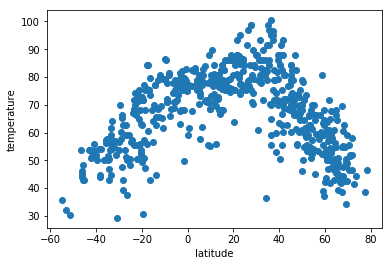

In [46]:
plt.scatter(lat_c, temp_c)
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.savefig('latitude_vs_temperature.png')

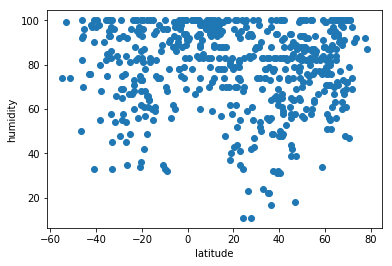

In [47]:
plt.scatter(lat_c, humidity_c)
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.savefig('latitude_vs_humidity.png')

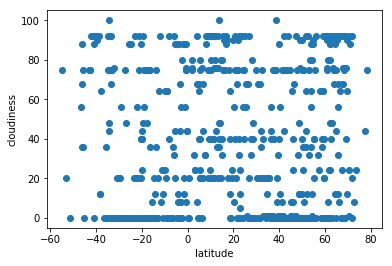

In [48]:
plt.scatter(lat_c, cloudiness_c)
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.savefig('latitude_vs_cloudiness.png')

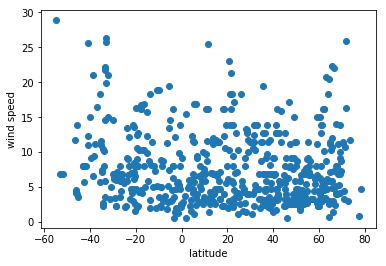

In [49]:
plt.scatter(lat_c, wind_speed_c)
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.savefig('latitude_vs_windspeed.png')

In [50]:
import logging
import sys


In [51]:
# print to log
log = open("myprog.log", "a")
sys.stdout = log

query_url = f'{url}&q='
index = 0
city_name = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lon = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        index += 1
        # pprint(response)
        # print(response['main'])
        print('-------------------------')
        print('city number:' + str(index))
        print('city name: ' + city)
        print('latitude:' + str(response['coord']['lat']))
        print('longitude:' + str(response['coord']['lon']))
        print('temperature: ' + str(response['main']['temp_max'])) 
        print('humidity: ' + str(response['main']['humidity']))    
        print('cloudiness: ' + str(response['clouds']['all'])) 
        print('wind speed: ' + str(response['wind']['speed']))
        
    except KeyError:      
        index += 1
        print('-------------------------')
        print('city number:' + str(index))
        print('city name: ' + city)
        print('lat: ' + 'na')
        lat.append('na')
        print('lon: ' + 'na')
        lon.append('na')
        print('temperature: ' + 'na')
        temp.append('na')
        print('humidity: ' + 'na')
        humidity.append('na')
        print('cloudiness: ' + 'na')
        cloudiness.append('na')
        print('wind_speed: ' + 'na')
        wind_speed.append('na')